In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# bulid dataset

In [2]:
class_=['A','B','C','D','E','F','G']
Drink=['Coke','Pepsi','7Up','Sprite','Latte','Espresso','Cappuccino']
rank=[7,6,5,4,3,2,1]
count=[200,100,100,200,100,100,200]
amount=[(100, 200),(200, 10),(200, 10),(400, 100),(800, 10),(800, 10),(900, 400)]

In [3]:
dic=['class','Drink','rank','count','amount','test']

In [4]:
asd=pd.DataFrame(columns=dic)
asd['class']=class_
asd['Drink']=Drink
asd['rank']=rank
asd['count']=count
asd['amount']=amount
asd

,class,Drink,rank,count,amount,test
0,A,Coke,7,200,"(100, 200)",NaN
1,B,Pepsi,6,100,"(200, 10)",NaN
2,C,7Up,5,100,"(200, 10)",NaN
3,D,Sprite,4,200,"(400, 100)",NaN
4,E,Latte,3,100,"(800, 10)",NaN
5,F,Espresso,2,100,"(800, 10)",NaN
6,G,Cappuccino,1,200,"(900, 400)",NaN


# 隨機產生常態分佈資料

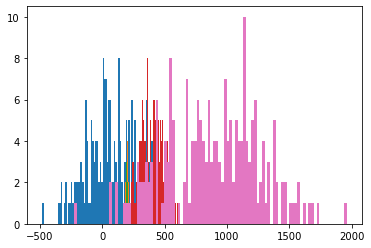

In [5]:
import numpy
import matplotlib.pyplot as plt

#x = numpy.random.normal(100, 200, 200)
x=[]
for i in range(len(count)):
    x.append(numpy.random.normal(amount[i][0], amount[i][1], count[i]))
    
plt.hist(x[0], 100)
plt.hist(x[1], 100)
plt.hist(x[2], 100)
plt.hist(x[3], 100)
plt.hist(x[4], 100)
plt.hist(x[5], 100)
plt.hist(x[6], 100)

plt.show()

In [6]:
asd['test']=x

# word2vec 

In [7]:
#googlennews dowload
#沒有googlenews請下載~
# wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [8]:
import gensim
import pandas as pd
model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\Tsai\GoogleNews-vectors-negative300.bin', binary=True)  

In [9]:
vec=[]
for i in Drink:
    vec.append(model[i])
#兩個類別的距離    
y1 = model.similarity("Coke", "Cappuccino")
y1

0.14073473

In [10]:
c=[]
qwe=pd.DataFrame(columns=Drink)
qwe

,Coke,Pepsi,7Up,Sprite,Latte,Espresso,Cappuccino


In [11]:
#各個node之間距離之矩陣

In [76]:
for i in range(len(Drink)):
    for j in range(len(Drink)):
        #qwe[Drink[i]]
        c.append(model.similarity(Drink[i],Drink[j]))
    #print(qwe[Drink[i]])
    qwe[Drink[i]]=c
    c=[]

In [81]:
from sklearn.manifold import TSNE
from sklearn import preprocessing #标准化数据模块

embedding = TSNE(n_components=3,init='pca',n_iter=250)
X_transformed=embedding.fit_transform(qwe)
X_transformed.shape
X_transformed

array([[ 396.11682 ,   53.753563,  202.08836 ],
       [ 415.7416  , -105.230156,  217.31645 ],
       [ 297.69986 ,   75.35961 , -403.21027 ],
       [ 332.85394 ,  -31.598057,  -75.28403 ],
       [-452.7271  ,  279.17783 ,   65.991455],
       [-533.21747 ,  154.98485 ,   28.447187],
       [-456.51697 , -428.02795 ,  -35.59106 ]], dtype=float32)

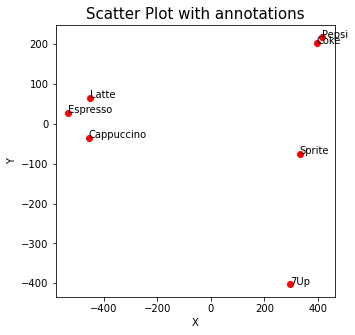

In [87]:
import matplotlib.pyplot as plot
plot.figure(figsize=(5,5))
plot.scatter(X_transformed[:,0],X_transformed[:,2],color="red")
plot.xlabel("X")
plot.ylabel("Y")
plot.title("Scatter Plot with annotations",fontsize=15)
for i,label in enumerate(qwe.columns):
        plot.annotate(label, (embedding.embedding_[i,0], embedding.embedding_[i,2]))
plot.show()